In [1]:
# Common parameters and imports
from optimal_exit import *
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition)


Nsim = 2000
import pickle
ngfs_vars = pickle.load( open( "ngfs_variables.p", "rb" ) )
monthly_params = scipy.io.loadmat('monthly_params.mat')
Phi = monthly_params['Phi']
Sigma = monthly_params['Sigma']
sigma_sig = np.sqrt(12)*float(monthly_params['sigmaGHG'])
R_C = 0.48
C_V = 2.6 
C_F = 58000 
W = 1000
emission_rate = .71 




Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

IntProgress(value=0, description='Simulation 11', max=360)

IntProgress(value=0, description='Revenues 11', max=31)

IntProgress(value=0, description='LS 11', max=30)

Calculation time:  16.708818912506104


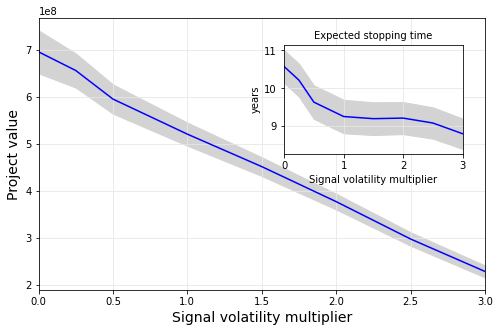

In [2]:
# Figure 4, right graph (sensitivity to signal volatility)

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.

sig_fact = np.array([0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sigma_fact = np.ones(len(sig_fact))
r = 0.01*np.ones(len(sig_fact))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                     pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sig_fact,lb,ub,color='lightgray')
ax1.plot(sig_fact,price,color='blue')
ax1.set_xlabel("Signal volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sig_fact[0],sig_fact[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sig_fact,ltau,utau,color='lightgray')
ax2.plot(sig_fact,mtau,color='blue')
ax2.set_xlim([sig_fact[0],sig_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Signal volatility multiplier",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('sigvol.pdf',format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


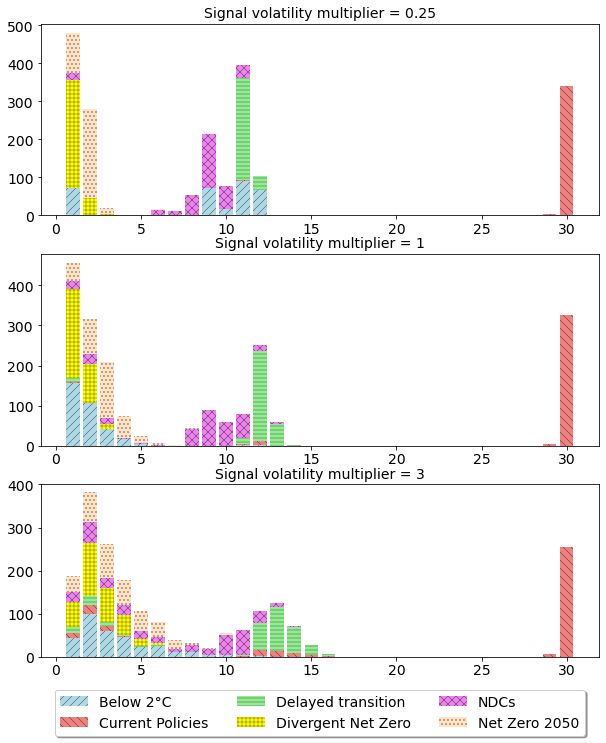

In [3]:
# Figure 5, right graph (distribution of exit times)
list_tau = [tau[1,I==i] for i in range(6)]
htau1 = []
for eltau in list_tau:
    htau1.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[3,I==i] for i in range(6)]
htau2 = []
for eltau in list_tau:
    htau2.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[7,I==i] for i in range(6)]
htau3 = []
for eltau in list_tau:
    htau3.append(np.array([sum(eltau==i) for i in range(1,31)]))
    
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3
scenarios =  ['Below 2°C', 'Current Policies', 'Delayed transition', 
                 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']
#/ , \\ , | , - , + , x, o, O, ., *:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.bar(np.arange(1,31),htau1[0],label=scenarios[0],color='lightblue',hatch="///")
plt.bar(np.arange(1,31),htau1[1],bottom=htau1[0],label=scenarios[1],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau1[2],bottom=htau1[0]+htau1[1],label=scenarios[2],color='lightgreen',hatch="---")
plt.bar(np.arange(1,31),htau1[3],bottom=htau1[0]+htau1[1]+htau1[2],label=scenarios[3],color='yellow',hatch="+++")
plt.bar(np.arange(1,31),htau1[4],bottom=htau1[0]+htau1[1]+htau1[2]+htau1[3],label=scenarios[4],color="violet",hatch="xxx")
plt.bar(np.arange(1,31),htau1[5],bottom=htau1[0]+htau1[1]+htau1[2]+htau1[3]+htau1[4],label=scenarios[5],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 0.25',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14,loc=1)
plt.subplot(312)
plt.bar(np.arange(1,31),htau2[0],label=scenarios[0],color='lightblue',hatch="///")
plt.bar(np.arange(1,31),htau2[1],bottom=htau2[0],label=scenarios[1],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau2[2],bottom=htau2[0]+htau2[1],label=scenarios[2],color='lightgreen',hatch="---")
plt.bar(np.arange(1,31),htau2[3],bottom=htau2[0]+htau2[1]+htau2[2],label=scenarios[3],color='yellow',hatch="+++")
plt.bar(np.arange(1,31),htau2[4],bottom=htau2[0]+htau2[1]+htau2[2]+htau2[3],label=scenarios[4],color="violet",hatch="xxx")
plt.bar(np.arange(1,31),htau2[5],bottom=htau2[0]+htau2[1]+htau2[2]+htau2[3]+htau2[4],label=scenarios[5],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 1',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)
ax = plt.subplot(313)
plt.bar(np.arange(1,31),htau3[0],label=scenarios[0],color='lightblue',hatch="///")
plt.bar(np.arange(1,31),htau3[1],bottom=htau3[0],label=scenarios[1],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau3[2],bottom=htau3[0]+htau3[1],label=scenarios[2],color='lightgreen',hatch="---")
plt.bar(np.arange(1,31),htau3[3],bottom=htau3[0]+htau3[1]+htau3[2],label=scenarios[3],color='yellow',hatch="+++")
plt.bar(np.arange(1,31),htau3[4],bottom=htau3[0]+htau3[1]+htau3[2]+htau3[3],label=scenarios[4],color="violet",hatch="xxx")
plt.bar(np.arange(1,31),htau3[5],bottom=htau3[0]+htau3[1]+htau3[2]+htau3[3]+htau3[4],label=scenarios[5],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 3',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3,fontsize=14)
#plt.suptitle('Distribution of stopping times',fontsize=14)
plt.savefig('taufreq.eps',format='eps')


Selected scenarios:  ['Current Policies', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

IntProgress(value=0, description='Simulation 11', max=360)

IntProgress(value=0, description='Revenues 11', max=31)

IntProgress(value=0, description='LS 11', max=30)

Calculation time:  7.108536243438721


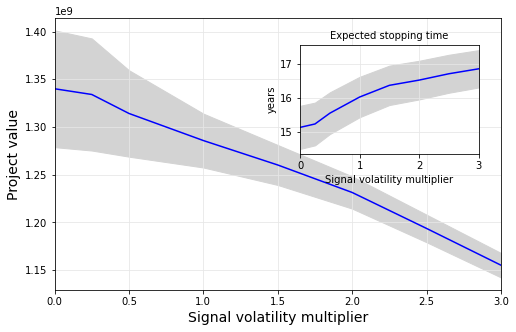

In [4]:
# Figure 4, left graph (sensitivity to signal volatility, two scenarios)

SS = [1,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.

sig_fact = np.array([0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sigma_fact = np.ones(len(sig_fact))
r = 0.01*np.ones(len(sig_fact))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                     pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sig_fact,lb,ub,color='lightgray')
ax1.plot(sig_fact,price,color='blue')
ax1.set_xlabel("Signal volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sig_fact[0],sig_fact[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sig_fact,ltau,utau,color='lightgray')
ax2.plot(sig_fact,mtau,color='blue')
ax2.set_xlim([sig_fact[0],sig_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Signal volatility multiplier",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('scenarios15.pdf',format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


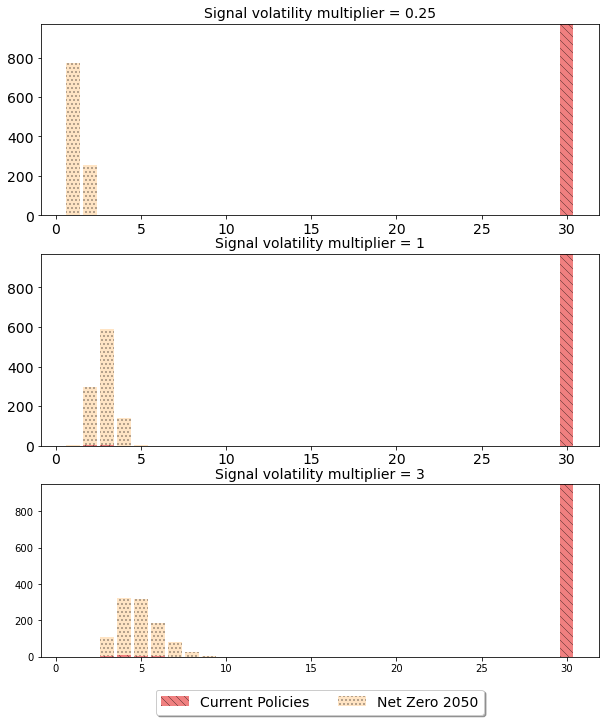

In [5]:
# Figure 5, left graph (distribution of stopping times)
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3


list_tau = [tau[1,I==i] for i in range(2)]
htau1 = []
for eltau in list_tau:
    htau1.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[3,I==i] for i in range(2)]
htau2 = []
for eltau in list_tau:
    htau2.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[7,I==i] for i in range(2)]
htau3 = []
for eltau in list_tau:
    htau3.append(np.array([sum(eltau==i) for i in range(1,31)]))
    
scenarios =  ['Current Policies',  'Net Zero 2050']
#/ , \\ , | , - , + , x, o, O, ., *:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.bar(np.arange(1,31),htau1[0],label=scenarios[0],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau1[1],bottom=htau1[0],label=scenarios[1],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 0.25',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.legend(fontsize=14)
plt.subplot(312)
plt.bar(np.arange(1,31),htau2[0],label=scenarios[0],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau2[1],bottom=htau2[0],label=scenarios[1],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 1',fontsize=14)
#plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = plt.subplot(313)
plt.bar(np.arange(1,31),htau3[0],label=scenarios[0],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau3[1],bottom=htau3[0],label=scenarios[1],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 3',fontsize=14)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3,fontsize=14)
#plt.suptitle('Distribution of stopping times',fontsize=14)
plt.savefig('taufreq15.eps',format='eps')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

IntProgress(value=0, description='Simulation 11', max=360)

IntProgress(value=0, description='Revenues 11', max=31)

IntProgress(value=0, description='LS 11', max=30)

Calculation time:  11.441554307937622


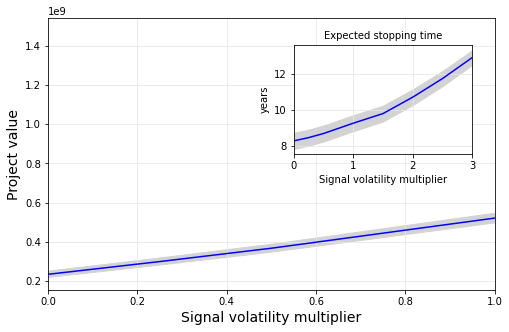

In [7]:
# Figure 6, left graph (sensitivity to factor volatility)

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.

sigma_fact = np.array([0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sig_fact = np.ones(len(sigma_fact))
r = 0.01*np.ones(len(sigma_fact))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                     pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sigma_fact,lb,ub,color='lightgray')
ax1.plot(sigma_fact,price,color='blue')
ax1.set_xlabel("Factor volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sigma_fact[0],sig_fact[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sigma_fact,ltau,utau,color='lightgray')
ax2.plot(sigma_fact,mtau,color='blue')
ax2.set_xlim([sigma_fact[0],sigma_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Factor volatility multiplier",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('sigfact.pdf',format='pdf')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

Calculation time:  10.944936037063599


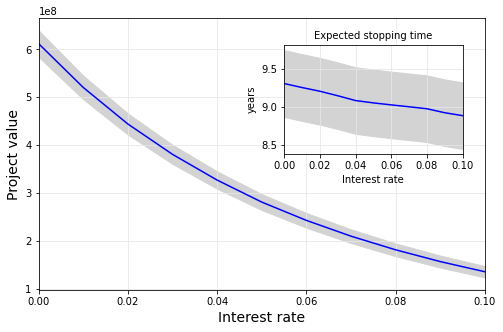

In [9]:
# Figure 6, left graph (sensitivity to interest rate)

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.

r = np.linspace(0., 0.1, 11)
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(r))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                        pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(r,lb,ub,color='lightgray')
ax1.plot(r,price,color='blue')
ax1.set_xlabel("Interest rate",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([r[0],r[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(r,ltau,utau,color='lightgray')
ax2.plot(r,mtau,color='blue')
ax2.set_xlim([r[0],r[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Interest rate",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('r.pdf',format='pdf')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

Calculation time:  8.492300987243652


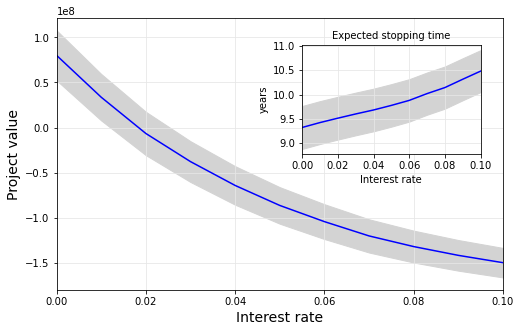

In [3]:
# Figure 7, left graph (sensitivity to interest rate, positive decommissioning cost)

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.2

r = np.linspace(0., 0.1, 11)
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(r))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                        pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(r,lb,ub,color='lightgray')
ax1.plot(r,price,color='blue')
ax1.set_xlabel("Interest rate",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([r[0],r[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(r,ltau,utau,color='lightgray')
ax2.plot(r,mtau,color='blue')
ax2.set_xlim([r[0],r[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Interest rate",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('r_positive_decom.pdf',format='pdf')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

IntProgress(value=0, description='Simulation 1', max=360)

IntProgress(value=0, description='Revenues 1', max=31)

IntProgress(value=0, description='LS 1', max=30)

IntProgress(value=0, description='Simulation 2', max=360)

IntProgress(value=0, description='Revenues 2', max=31)

IntProgress(value=0, description='LS 2', max=30)

IntProgress(value=0, description='Simulation 3', max=360)

IntProgress(value=0, description='Revenues 3', max=31)

IntProgress(value=0, description='LS 3', max=30)

IntProgress(value=0, description='Simulation 4', max=360)

IntProgress(value=0, description='Revenues 4', max=31)

IntProgress(value=0, description='LS 4', max=30)

IntProgress(value=0, description='Simulation 5', max=360)

IntProgress(value=0, description='Revenues 5', max=31)

IntProgress(value=0, description='LS 5', max=30)

IntProgress(value=0, description='Simulation 6', max=360)

IntProgress(value=0, description='Revenues 6', max=31)

IntProgress(value=0, description='LS 6', max=30)

IntProgress(value=0, description='Simulation 7', max=360)

IntProgress(value=0, description='Revenues 7', max=31)

IntProgress(value=0, description='LS 7', max=30)

IntProgress(value=0, description='Simulation 8', max=360)

IntProgress(value=0, description='Revenues 8', max=31)

IntProgress(value=0, description='LS 8', max=30)

IntProgress(value=0, description='Simulation 9', max=360)

IntProgress(value=0, description='Revenues 9', max=31)

IntProgress(value=0, description='LS 9', max=30)

IntProgress(value=0, description='Simulation 10', max=360)

IntProgress(value=0, description='Revenues 10', max=31)

IntProgress(value=0, description='LS 10', max=30)

Calculation time:  8.524703979492188


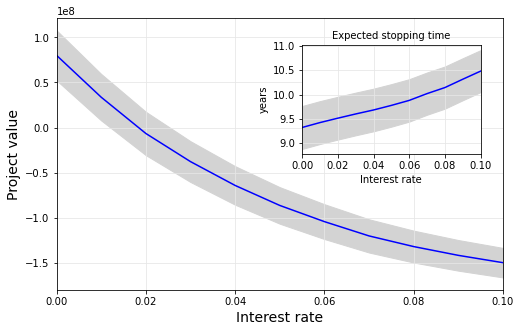

In [4]:
# Figure 7, right graph (sensitivity to interest rate, negative decommissioning cost)

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
decom_cost = 0.2

r = np.linspace(0., 0.1, 11)
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(r))
rseed = 42

price, ub, lb, mtau, utau, ltau, tau, I = simulate_exit(ngfs_vars,SS,Nsim,rseed,r,decom_cost,
                                                        pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)


fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(r,lb,ub,color='lightgray')
ax1.plot(r,price,color='blue')
ax1.set_xlabel("Interest rate",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([r[0],r[-1]])
#ax1.set_ylim([2.5e9,9.5e9])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.55,0.5,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(r,ltau,utau,color='lightgray')
ax2.plot(r,mtau,color='blue')
ax2.set_xlim([r[0],r[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Expected stopping time',fontsize=10)
ax2.set_xlabel("Interest rate",fontsize=10)
ax2.set_ylabel("years",fontsize=10)

plt.savefig('r_negative_decom.pdf',format='pdf')

In [2]:
# Table 3

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(1)
decom_cost = 0.2

r = 0.1*np.ones(1)
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(r))
rseed = 42

for i in range(6):
    price, ub, lb, eprice, eub, elb, mtau, utau, ltau, tau, I = simulate_exit_euro(ngfs_vars,SS[i:i+1],Nsim,rseed,r,decom_cost,
                                                            pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_C,C_F,C_V,emission_rate)
    print('Price : ', float(price), ', price (no exit) : ', eprice,', exit time : ',float(mtau),'\n')




Selected scenarios:  ['Below 2°C']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.37933897972106934
Price :  84251445.7911329 , price (no exit) :  [-1.02773367e+08] , exit time :  13.9045 

Selected scenarios:  ['Current Policies']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.37195324897766113
Price :  727915330.7609288 , price (no exit) :  [7.27915331e+08] , exit time :  30.0 

Selected scenarios:  ['Delayed transition']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.3696320056915283
Price :  310343034.57326996 , price (no exit) :  [-3.27911433e+09] , exit time :  11.0 

Selected scenarios:  ['Divergent Net Zero']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.38357996940612793
Price :  -771302662.9031705 , price (no exit) :  [-9.36277483e+09] , exit time :  1.0 

Selected scenarios:  ['Nationally Determined Contributions (NDCs)']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.38331079483032227
Price :  -14623430.724827511 , price (no exit) :  [-92281063.12991418] , exit time :  13.57 

Selected scenarios:  ['Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=360)

IntProgress(value=0, description='Revenues 0', max=31)

IntProgress(value=0, description='LS 0', max=30)

Calculation time:  0.381087064743042
Price :  -483134005.4176793 , price (no exit) :  [-4.7676815e+09] , exit time :  2.056 

